<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

if not os.path.exists('horses_vs_zebras/data'):
    !wget -q https://tinyurl.com/odsc-cv-platform-HvZ1 -O data.zip
    !unzip -q data.zip
    !mkdir -p horses_vs_zebras
    !mv data horses_vs_zebras


/mnt/d04d289c-d0a7-4fd4-b883-ff227b3a8695/githubs/AutoTrain


## Verify Config

In [3]:
!cat configs/classification.ini

[project]
owner: sizhky
name: horses_vs_zebras
location: ${project.name}
model_directory: ${project.location}/models
type: classification
num_classes: 2

[training]
dir: ${project.location}/data
train_ratio: 0.8

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/test

[training.preprocess]
@preprocess_function: my_preprocess
image_size: ${architecture.image_size}

[training.scheme]
epochs: 5
freeze_epochs: 3
# initial_checkpoint: ${training.scheme.output_path}
# mixup augmentation
mixup: 0.5
# cutmix
cutmix: 0.5
mixup_switch_prob: 0.3
amp: true
# random augmentations
aa: rand-m9-mstd0.5
batch_size: 8
output: ${project.model_directory}/trained-model-v1
output_path: ${training.scheme.output}/model.pt

[architecture]
image_size: 224
[architecture.backbone]
model: efficientnet_b0
# everytime you change the model, vector size 
# must match the model's backbone output.
vector_size: 1280
[architecture.head]
@head: custom_head
head_input_size: ${architecture.back

In [4]:
os.environ['CONFIG'] = 'configs/classification.ini'
!python auto_train_classification/train.py

2021-09-14 21:17:23.334 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-14 21:17:43.787 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at horses_vs_zebras/find_lr_plot.png
2021-09-14 21:17:43.787 | INFO     | __main__:find_best_learning_rate:24 - Suggested LRs: 0.0007585775572806596 and 0.0831763744354248
2021-09-14 21:17:43.787 | INFO     | __main__:train_model:40 - Using lr: 0.0831763744354248
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 0.9439266920089722, 0.24460919201374054, 0.921875, '00:01']
[1, 0.5578933954238892, 0.15374480187892914, 0.96875, '00:01']
[2, 0.4972801208496094, 0.00097924773581326, 1.0, '00:01']
[0, 0.2523708939552307, 0.03927373141050339, 0.984375, '00:02']
[1, 0.25639787316322327, 0.28672412037849426, 0.96875, '00:02']
[2, 0.2816964089870453, 0.3840918242931366, 0.984375, '00:01']
[3, 0.3002922832965851, 0.17817671597003937, 0.953125, '00:01']
[4, 0.30607831478118896, 0.09000647813081741, 0.968

---
## Validate

2021-09-14 21:18:02.011 | INFO     | auto_train_classification.infer:<module>:6 - Loaded weights from horses_vs_zebras/models/trained-model-v1/model.pt to given model


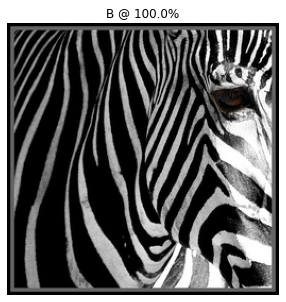

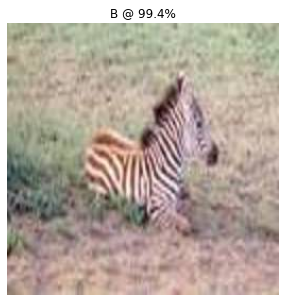

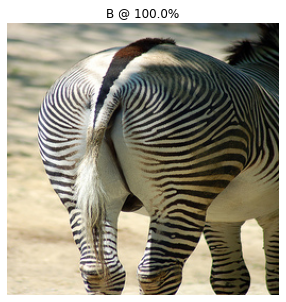

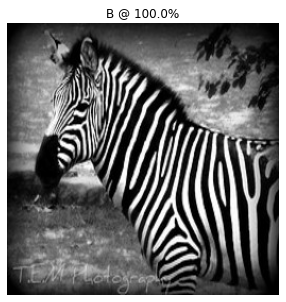

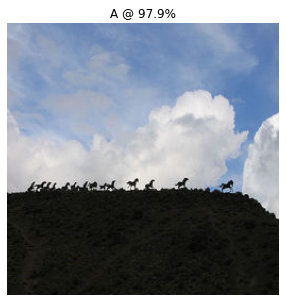

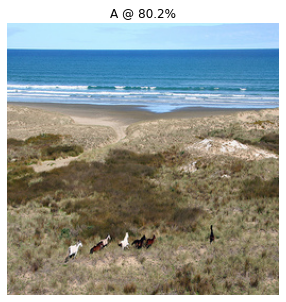

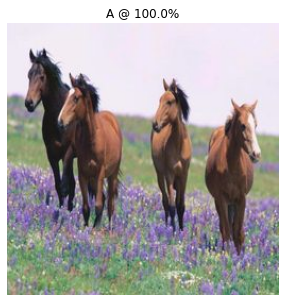

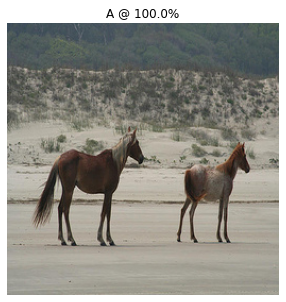

In [5]:
from auto_train_classification.infer import infer
p1 = infer('horses_vs_zebras/data/test/B')
p2 = infer('horses_vs_zebras/data/test/A')

In [6]:
p1, p2

([(» horses_vs_zebras/data/test/B/n02391049_2760.jpg, 'B', tensor(1.)),
  (» horses_vs_zebras/data/test/B/n02391049_2220.jpg, 'B', tensor(0.9940)),
  (» horses_vs_zebras/data/test/B/n02391049_1270.jpg, 'B', tensor(1.)),
  (» horses_vs_zebras/data/test/B/n02391049_3060.jpg, 'B', tensor(1.))],
 [(» horses_vs_zebras/data/test/A/n02381460_3010.jpg, 'A', tensor(0.9788)),
  (» horses_vs_zebras/data/test/A/n02381460_1100.jpg, 'A', tensor(0.8019)),
  (» horses_vs_zebras/data/test/A/n02381460_800.jpg, 'A', tensor(1.)),
  (» horses_vs_zebras/data/test/A/n02381460_20.jpg, 'A', tensor(1.))])